# Maskin Læring: Klassifisering av dyr

## Trening av vårt første CNN!
![l](https://www.managers.org.uk/wp-content/uploads/2020/03/BrainTraining.jpg)  
I denne notebooken kommer vi til å gjøre et par ting: 
1. Skrive inn studentnummeret vårt
2. Generere et nevralt nettverk(tenk en hjerne) med dette studentnummeret. 
3. Trene dette nettverket

Først så setter vi inn student nummeret vårt.

In [47]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
os.environ["CUDA_VISIBLE_DEVICES"]="1"
kaggle_user= "uzaaft"
kaggle_api = "eef66e4e79f6db8c868a369edc57500c"
os.environ["KAGGLE_USERNAME"] = kaggle_user
os.environ["KAGGLE_KEY"] = kaggle_api
!pip install kaggle
1!kaggle datasets download -d alessiocorrado99/animals10

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
100%|████████████████████████████████████████| 586M/586M [01:35<00:00, 3.95MB/s]
100%|████████████████████████████████████████| 586M/586M [01:35<00:00, 6.43MB/s]


In [51]:
!rm -rf translate.py
!unzip -q animals10.zip 

replace raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [52]:
Student_nr = input("Hva er student nummeret ditt?")

random.seed(Student_nr)

activation_layers = [
            "relu",
            "sigmoid",
            "softmax",
            "softplus",
            "softsign",
            "tanh",
            "selu",
            "elu",
            "exponential",
]
number = random.randint(1, len(activation_layers))
return activation_layers[number]


Hva er student nummeret ditt?104348


NameError: name 'random' is not defined

In [53]:
base_dir = './raw-img'
LABELS = os.listdir(base_dir)
LABELS.sort()
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant",
                 "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat",
                 "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel",
                 "dog": "cane", "cavallo": "horse", "elephant" : "elefante", 
                 "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto",
                 "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}
LABELS_english = list(translate.values())
base_dir + '/' + LABELS[0]
dataset=[]
testset=[]
count=0

for label in tqdm(LABELS):
    i=0
#     path = base_dir + '/' + label
    path = os.path.join(base_dir, label)
#     print(path)
    for img in os.listdir(path):
#         print(img)
        image=load_img(os.path.join(path, img), grayscale=False, color_mode='rgb', target_size=(75,75))
        image=img_to_array(image)
        image=image/255.0
        if i<1000:
            dataset.append([image,count])
            i+=1
        else:
            testset.append([image,count])
    count=count+1

X,y =zip(*dataset)
test, test_labels=zip(*testset)
y = to_categorical(y)
y=np.array(y)
X=np.array(X)
print("Train Shape:{}\nTrain Labels shape: {}".format(X.shape,y.shape))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=99)

datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    fill_mode="nearest"
)

  0%|          | 0/10 [00:00<?, ?it/s]

Train Shape:(10000, 75, 75, 3)
Train Labels shape: (10000, 10)


In [54]:
def predict_image(image):
    image=img_to_array(image)/255 
    prediction_image=np.array(image)
    prediction_image= np.expand_dims(image, axis=0)
    
    pred = model.predict(prediction_image)
    value = np.argmax(pred)
    print("Prediction : ", LABELS_english[value])

In [55]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='elu', input_shape=(75, 75, 3), padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(3))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='elu', padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(2))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='elu', padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(1))


model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='elu', padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(1))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation='elu'))
model.add(tf.keras.layers.Dense(32, activation='elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3),
             metrics=['acc'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 73, 73, 16)        448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 9, 9, 64)         

### I cellen ovenfor lager vi modellen. Vi prøver å gjette hvilket dyr det er på bildene med denne ulærte modellen

Prediction :  chicken


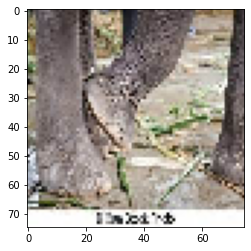

Prediction :  chicken


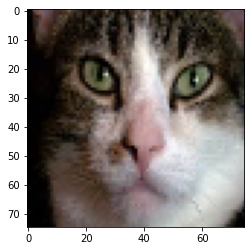

Prediction :  chicken


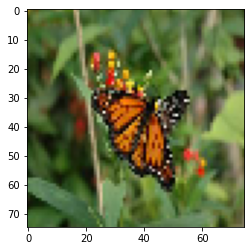

In [56]:
image=load_img("raw-img/elefante/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/gatto/1006.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/farfalla/OIP--7K5JzW1ZEmrY2YRyVjFCQHaE7.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()

In [57]:
history = model.fit(
     datagen.flow(X_train, y_train, batch_size=128), 
    validation_data = (X_valid, y_valid),
    epochs=25
)

Epoch 1/25
63/63 [==============================] - 6s 94ms/step - loss: 2.3818 - acc: 0.1855 - val_loss: 2.2177 - val_acc: 0.1875
Epoch 2/25
63/63 [==============================] - 6s 91ms/step - loss: 2.1095 - acc: 0.2614 - val_loss: 2.3834 - val_acc: 0.1685
Epoch 3/25
63/63 [==============================] - 6s 91ms/step - loss: 1.9867 - acc: 0.2976 - val_loss: 2.6065 - val_acc: 0.1255
Epoch 4/25
63/63 [==============================] - 6s 90ms/step - loss: 1.8901 - acc: 0.3289 - val_loss: 2.7558 - val_acc: 0.1165
Epoch 5/25
63/63 [==============================] - 6s 92ms/step - loss: 1.8308 - acc: 0.3464 - val_loss: 2.4487 - val_acc: 0.1815
Epoch 6/25
63/63 [==============================] - 6s 91ms/step - loss: 1.7847 - acc: 0.3574 - val_loss: 2.4278 - val_acc: 0.1960
Epoch 7/25
63/63 [==============================] - 6s 91ms/step - loss: 1.7326 - acc: 0.3859 - val_loss: 2.0516 - val_acc: 0.3225
Epoch 8/25
63/63 [==============================] - 6s 92ms/step - loss: 1.7010 - a

### La oss se hvor bra modellen vår gjetter

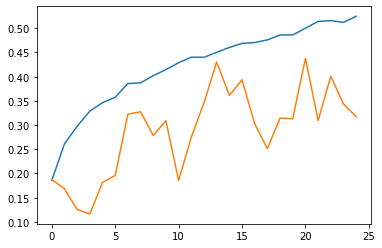

In [58]:
plt.plot(history.history['acc'], label = "Acc")
plt.plot(history.history['val_acc'], label = "Val Acc")

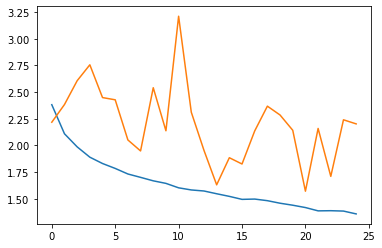

In [59]:
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = "Val loss")

Prediction :  chicken


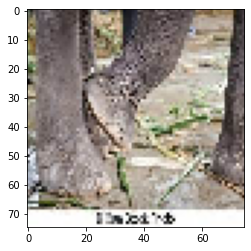

Prediction :  chicken


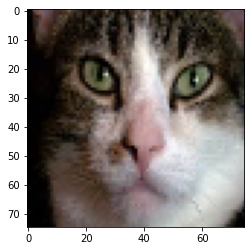

Prediction :  butterfly


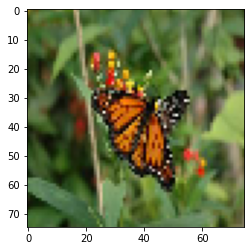

In [60]:
image=load_img("raw-img/elefante/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/gatto/1006.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/farfalla/OIP--7K5JzW1ZEmrY2YRyVjFCQHaE7.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()

In [ ]:
history = model.fit(
     datagen.flow(X_train, y_train, batch_size=128), 
    validation_data = (X_valid, y_valid),
    epochs=100, 
    initial_epoch = 25
)

Epoch 26/500
63/63 [==============================] - 6s 93ms/step - loss: 1.3339 - acc: 0.5284 - val_loss: 2.2084 - val_acc: 0.2850
Epoch 27/500
63/63 [==============================] - 6s 92ms/step - loss: 1.3390 - acc: 0.5343 - val_loss: 2.1864 - val_acc: 0.3360
Epoch 28/500
63/63 [==============================] - 6s 91ms/step - loss: 1.3202 - acc: 0.5449 - val_loss: 1.6469 - val_acc: 0.4460
Epoch 29/500
63/63 [==============================] - 6s 89ms/step - loss: 1.3001 - acc: 0.5440 - val_loss: 1.8424 - val_acc: 0.4045
Epoch 30/500
63/63 [==============================] - 6s 92ms/step - loss: 1.2878 - acc: 0.5481 - val_loss: 1.9543 - val_acc: 0.4000
Epoch 31/500
63/63 [==============================] - 6s 90ms/step - loss: 1.2771 - acc: 0.5518 - val_loss: 1.7339 - val_acc: 0.4230
Epoch 32/500
63/63 [==============================] - 6s 90ms/step - loss: 1.2671 - acc: 0.5574 - val_loss: 1.4652 - val_acc: 0.4865
Epoch 33/500
63/63 [==============================] - 6s 89ms/step - 

In [ ]:
plt.plot(history.history['acc'], label = "Acc")
plt.plot(history.history['val_acc'], label = "Val Acc")

In [ ]:
plt.plot(history.history['loss'],  label = "Loss")
plt.plot(history.history['val_loss'],  label = "Val loss")

In [ ]:
image=load_img("raw-img/elefante/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/gatto/1006.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/farfalla/OIP--7K5JzW1ZEmrY2YRyVjFCQHaE7.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()

In [ ]:
history = model.fit(
     datagen.flow(X_train, y_train, batch_size=128), 
    validation_data = (X_valid, y_valid),
    epochs=1000, 
    initial_epoch = 500
)

In [ ]:
plt.plot(history.history['acc'], label = "Acc")
plt.plot(history.history['val_acc'], label = "Val Acc")

In [ ]:
plt.plot(history.history['loss'],  label = "Loss")
plt.plot(history.history['val_loss'],  label = "Val loss")

In [ ]:
image=load_img("raw-img/elefante/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/gatto/1006.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/farfalla/OIP--7K5JzW1ZEmrY2YRyVjFCQHaE7.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()